# Complete the details below/*Vul die ontbrekende inligting hieronder in*:

## Name/*Naam*: AP Lotriet


### Student Number/*Studente Nommer*: 21617066

In [213]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [214]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix

from utils import plot_confusion_matrix

# Generate training data/*Genereer afrigtingsdata*

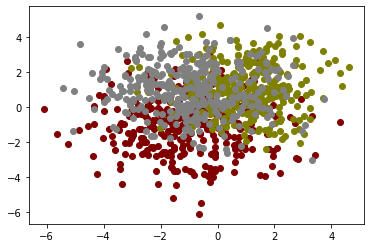

In [215]:
# Training data - three randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2+1, size = N)
# Mean of each cluster
means = np.array([[-1, 1, -1], [-1, 1, 1],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 3)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

# Plot the data
colors = ['maroon','olive','grey']
labels = np.unique(y)
for color, label in zip(colors, labels):
    class_data = X.T[np.flatnonzero(y == label)]
    plt.scatter(class_data[:,0],class_data[:,1],c=color)
plt.show()

#### Display the data that you generated (the result should be similar to the image below)/*Vertoon nou die gegenireerde data (die resultaat moet soortgelyk wees aan die onderstaande beeld)*:

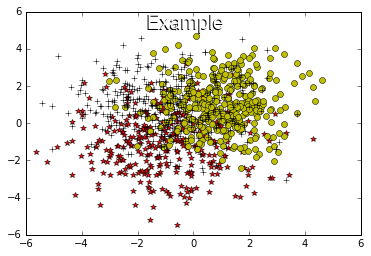

In [216]:
display(Image(filename='./images/wm_dat1.png'))

# Fit the training data to the scikit-learn softmax classifier/*Rig nou 'n softmax klassifiseerder af met die gegenereerde data*

The image above shows that there is considerable overlap between the classes. Use your trained classifier to assign all the training data to different classes.

*Die beeld hierbo wys dat die data van die verskillende klasse geweldig ourvleul. Gebruik nou jou afgerigte klassifiseerder om etikette aan al die datapunte toe te ken.*

**Print the confusion matrix and also plot it, to get something like the image below:**

**_Druk en stip nou die verwarringsmatriks. Jy behoort 'n beeld soortgelyk te kry as die een hieronder:_**


(2, 1000)
(1000,)
[[247  36  54]
 [ 32 244  59]
 [ 66  72 190]]


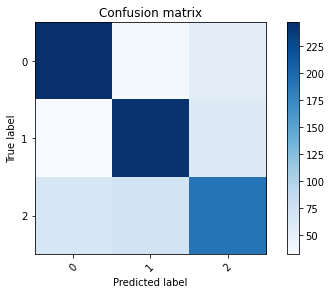

In [217]:
model = logis()
print(X.shape)
print(y.shape)
model.fit(X.T,y)
pred_y = model.predict(X.T)
conf_mat = confusion_matrix(y, pred_y)
print(conf_mat)

plot_confusion_matrix(cm=conf_mat, target_names=labels)

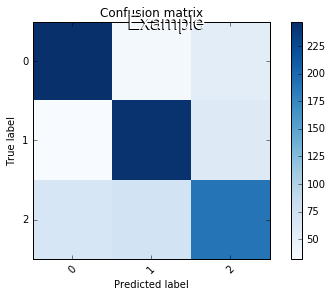

In [218]:
display(Image(filename='./images/wm_confusion.png'))

**Now plot the different classes as predicted by your system. You should get something like:** 

**_Stip nou die verskillende klasse (soos deur jou sisteem voorspel word). Jy behoort die volgende te kry:_** 

**Can you tell from the graph that this is a *linear* classifier?**

**_Kan jy van die grafiek af aflei dat die 'n lineere klassifiseerder is?_**

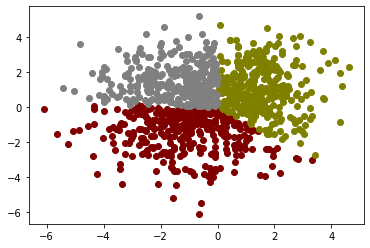

In [219]:
# Plot the data
for color, label in zip(colors, labels):
    class_data = X.T[np.flatnonzero(pred_y == label)]
    plt.scatter(class_data[:,0],class_data[:,1],c=color)
plt.show()

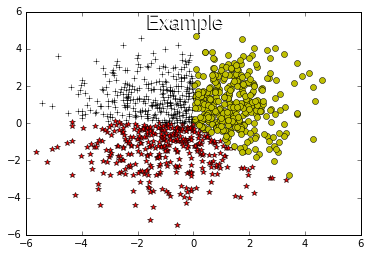

In [220]:
display(Image(filename='./images/wm_dat2.png'))

# Implement a Naive Bayes Classifier/_Implementeer 'n Naiewe Bayes Klassifieerder_

Implement your own Naive Bayes Classifier (from first principles). Train it using the exact same data you used for the previous question (write it in a seperate python file which you can import into the notebook). Implement it in a generic way, i.e. it should be able to work on $d$ dimensional data and it should not be limited to a certain amount of classes.

_Implementeer nou jou eie Naiewe Bayes Klassifiseerder (vanaf eerste beginsels). Rig dit af met presies dieselfde data wat jy gebruik het om jou vorige vraag te antwoord (implementeer die klassifiseerder in 'n aparte Python leer; voer dan die leer in hierdie notebook in). Maak jou implementasie so generies as moontlik, m.a.w. dit moet werk op $d$-dimensionele data en dit moet ook nie beperk wees tot 'n sekere aantal klasse nie._ 

Use your trained classifier to assign all the training data to different classes. _Gebruik nou jou implementasie om al die data aan verskillende klasse te allokeer._

**Print the confusion matrix and also plot it, to get something like the image below**

**_Druk en stip nou die verwarringsmatriks. Jy behoort 'n beeld soortgelyk te kry as die een hieronder_**

(3,)
(1000, 3)
My conf mat: 
[[241  39  57]
 [ 32 256  47]
 [ 62  83 183]]
Lib conf mat: 
[[247  36  54]
 [ 32 244  59]
 [ 66  72 190]]


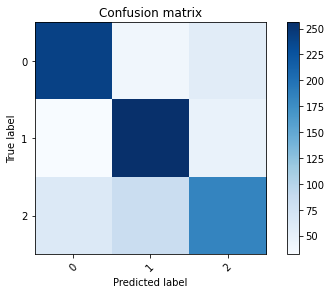

In [231]:
from naive import NaiveB

nb_model = NaiveB()
nb_model.fit(X.T, y)
nb_model.predict(X.T)
#print(nb_model.pcx)
print("My conf mat: ")
my_conf_mat = confusion_matrix(y, nb_model.prediction)
print(my_conf_mat)
print("Lib conf mat: ")
print(conf_mat)
plot_confusion_matrix(cm=my_conf_mat, target_names=labels)

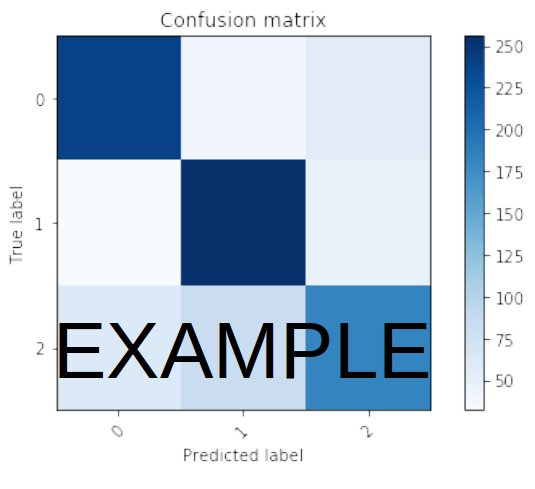

In [10]:
display(Image(filename='./images/conf_mat_bayes.jpg'))

**Now plot the different classes as predicted by your system. You should get something like:**

**_Stip nou die verskillende klasse (soos deur jou sisteem voorspel word). Jy behoort die volgende te kry:_** 

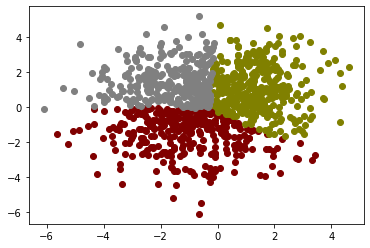

In [232]:
for color, label in zip(colors, labels):
    class_data = X.T[np.flatnonzero(nb_model.prediction == label)]
    plt.scatter(class_data[:,0],class_data[:,1],c=color)
plt.show()

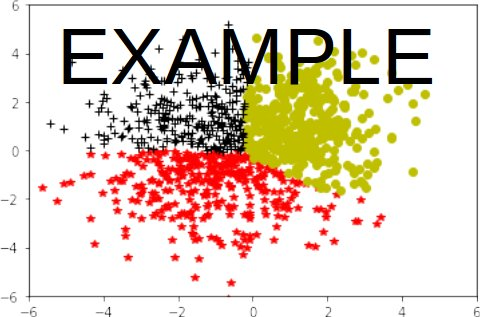

In [233]:
display(Image(filename='./images/predict_bayes.jpg'))

# Implement a Logistic Regression Classifier/_Implementeer 'n Logistiese Regessie Klassifiseerder_

Implement your own Logistic Regression classifier (from first principles). It should be generic and be able to work on $d$ dimensional data (and two classes). Please make your implementation as modular as possible, having a seperate function for the Hessian and the gradient vector (write it in a seperate python file which you can import into the notebook). A regularization term based on a Gaussian prior (with zero mean and covariance matrix $\lambda\mathbf{I}$) must be included.  Optionally, a bias term also needs to be incorporated into your classifier - this can be implemented by augmenting the training dataset with an additional all-one feature.

_Implementeer jou eie Logistiese Regressie Klassifiseerder (vanaf eerste beginsels). Jou implementasie moet generies wees en moet as invoer $d$-dimensionele data as toevoer kan ontvang (vir twee klasse). Maak jou implementasie so moduler as moontlik. Gebruik aparte funksies vir die Hessian en die gradient vektor (skryf jou klassifiseerder in 'n aparte Python leer wat jy dan in die notebook kan invoer). Jy moet ook regularisering implementeer (aanvaar 'n Normale prior (met 'n gemiddeld van nul en 'n kovariansie matriks wat gelyk is aan $\lambda\mathbf{I}$). Die opsie moet ook beskikbaar wees om 'n partydigheids term te kan inkorporeer as dit nodig sou wees - dit word in praktyk bewerkstelling deur 'n ekstra kenmerk kolom tot jou datastel te voeg wat slegs uit ene bestaan._

**Now train your classifier using the following data/_Rig nou jou klassifiseerder af deur gebruik te maak van die volgende data_**. Assume/Aanvaar: $\lambda = 10^{-8}$.

In [234]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
# Mean of each cluster
means = np.array([[-1, 1], [-1, 1],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])
print(X.shape)

(2, 1000)


**Use your trained classifier to assign all the training data to different classes.**

**_Gebruik nou jou implementasie om al die data aan verskillende klasse te allokeer_**

**Print the confusion matrix and also plot it, to get something like the image below:** 

**_Druk en stip nou die verwarringsmatriks. Jy behoort 'n beeld soortgelyk te kry as die een hieronder_**

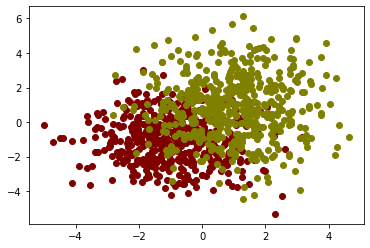

In [300]:
# Plot the data
colors = ['maroon','olive']
labels = np.unique(y)
for color, label in zip(colors, labels):
    class_data = X.T[np.flatnonzero(y == label)]
    plt.scatter(class_data[:,0],class_data[:,1],c=color)
plt.show()

w: (2, 1)
X: (2, 1000)
y: (1000,)
[[1.e-08]
 [1.e-08]]
[[-50.62537106  75.75958317]]
[[1.e-08]
 [1.e-08]]
[[184.714703   207.78055037]]
[[1.e-08]
 [1.e-08]]
[[-50.62537106  75.75958317]]
[[1.e-08]
 [1.e-08]]
[[184.714703   207.78055037]]
0w: [[1.27407332 0.63538655]]
[[1.27407332e-08]
 [6.35386551e-09]]
[[ 17.81123257 -35.84131097]]
[[1.e-08]
 [1.e-08]]
[[144.35328402 307.674074  ]]
1w: [[1.15068691 0.75187771]]
[[1.15068691e-08]
 [7.51877715e-09]]
[[-8.27504603  5.83352393]]
[[1.e-08]
 [1.e-08]]
[[164.61829092 278.90989605]]
2w: [[1.200955   0.73096227]]
[[1.20095500e-08]
 [7.30962272e-09]]
[[ 1.09493037 -3.19753901]]
[[1.e-08]
 [1.e-08]]
[[156.03517301 283.0951996 ]]
3w: [[1.19393779 0.7422572 ]]
[[1.19393779e-08]
 [7.42257197e-09]]
[[-0.71306515  0.42275116]]
[[1.e-08]
 [1.e-08]]
[[157.10722489 279.91971175]]
4w: [[1.19847651 0.74074694]]
[[1.19847651e-08]
 [7.40746938e-09]]
[[ 0.09344898 -0.28624729]]
[[1.e-08]
 [1.e-08]]
[[156.34217136 280.16845384]]
5w: [[1.19787879 0.74176864]]


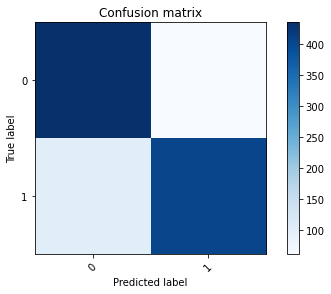

In [304]:
from logiRegression import LogiRegression
model_lg = LogiRegression()
w = np.array([[1,1]])
model_lg.fit(w,X,y,N,1e8)
model_lg.predict(X)
conf_mat = confusion_matrix(y, model_lg.prediction.T)
print(conf_mat)
plot_confusion_matrix(cm=conf_mat, target_names=labels)

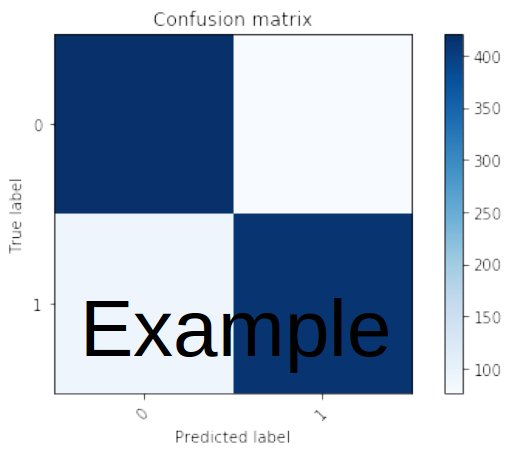

In [305]:
display(Image(filename='./images/conf_mat_logreg.jpg'))

**Now plot the different classes as predicted by your system. Add your decision boundary to the same plot. You should get something like:**

**_Stip nou die verskillende klasse (soos deur jou sisteem voorspel word). Voeg ook jou skeidingsgrens by. Jy behoort die volgende te kry:_** 

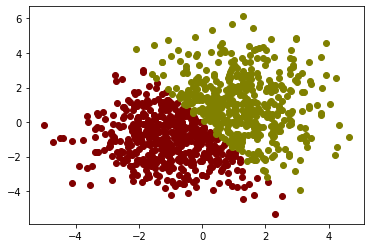

In [306]:
for color, label in zip(colors, labels):
    class_data = X.T[np.flatnonzero(model_lg.prediction == label)]
    plt.scatter(class_data[:,0],class_data[:,1],c=color)
    plt.plot()
plt.show()

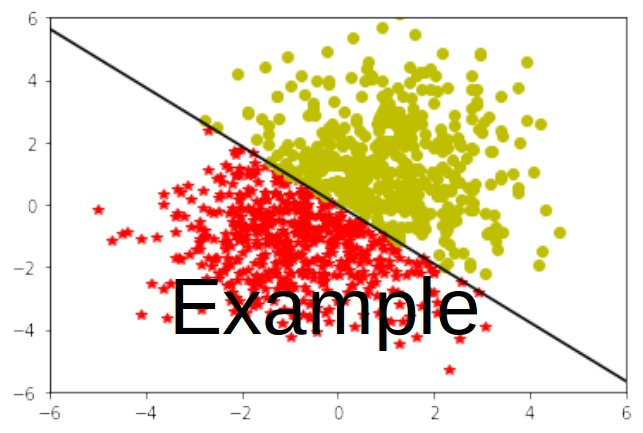

In [42]:
display(Image(filename='./images/predict_logreg.jpg'))

**Before continuing in the notebook, you will need to install the `lasagne` Python module with "pip3 install --user lasagne"**

**_Jy sal eers die `lasagne` Python module moet installeer (gebruik "pip3 install --user lasagne") voordat jy die res van die notebook sal kan hardloop._**

# Now classify the MNIST digits/_Klassifiseer nou die MNIST syfers_ 

The MNIST database provided in the assignment resources consists of low-resolution (28x28) grayscale images of handwritten digits ($0,1,2,3,4,5,6,7,8,9$). First, you read in a set of training digits and display them interactively to get an idea what they look like. Afterwards, you build and train a softmax classifier using scitkit-image and scikit-learn. You will then classify the digits in the test set and display the results. Finally, you will display the weights as images.

_Die MNIST datastel wat in die werkopdrag hulpbronne verkrygbaar is bestaan uit lae resolusie (28x28) grysskaal beelde van handgeskrewe sysfers ($0,1,2,3,4,5,6,7,8,9$). Ons gaan eers 'n afrigtingsstel inlees en dan dinamies vertoon sodat jy 'n beter idee kan vorm van hoe die datastel lyk. Daarna gaan jy 'n softmax klassifiseerder afrig (gebruik scitkit-image en scikit-learn). Laastens sal ons die syfers in die toetsstel klassifiseer en ook die resultate wat so verkry is vertoon._ 

First load the dataset - for more information about the dataset, see http://yann.lecun.com/exdb/mnist/.

_Laai eers die datastel - vir verdere inligting rakende die datastel: http://yann.lecun.com/exdb/mnist/._

In [81]:
from mnist import load_dataset
X_train, y_train, X_valid, y_valid, X_test, y_test = load_dataset()

## Display the test digits interactively/_Vertoon die syfers dinamies_.

In [82]:
from ipywidgets import interact
def show_digits(k=0):
    """
    Show the first 1000 digits in the training set
    """
    
    plt.imshow(X_train[k][0], cmap=cm.binary)   
    
    plt.show()
    
w = interact(show_digits, k =(0, 1000)) 


interactive(children=(IntSlider(value=0, description='k', max=1000), Output()), _dom_classes=('widget-interact…

## Train the softmax classifier/_Rig die softmax klassifiseerder af_

**Using the training set, build a softmax classifier. Use this classifier to classify the digits in the training set and the test set separately. Print the confusion matrix and also display it as an image for each case to get something like:**

**_Bou 'n softmax klassifiseerder deur gebruik te maak van die afrigtingsstel. Gebruik dan die klassifiseerder om die syfers in die afrigtingsstel asook die toetstel te klassifiseer. Vertoon en stip die verwarringsmatriks vir beide gevalle:_**


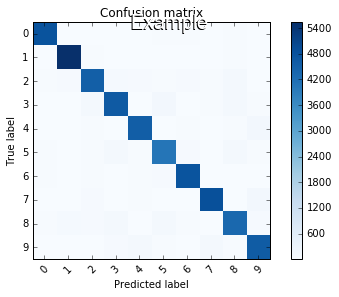

In [45]:
display(Image(filename='./images/wm_confusion2.png'))

### Accuracy

**Calculate the accuracy of your system as a fraction of the correctly classified digits. You should get something like 0.9254. use - `logis(C=1e5, solver='lbfgs', multi_class='multinomial')`**

**_Bereken nou die akkuraatheid van jou sisteem (m.a.w. watter fraksie van die syfers is reg geklassifiseer). Jy behoort min of meer 0.9254 te kry. gebruik - `logis(C=1e5, solver='lbfgs', multi_class='multinomial')`_**  


## Extracting the weights and display as images/_Ontrek die gewigte en vertoon as beelde_

**Extract the weights of the softmax classifier and display them as images. Each set of weights should correspond to a specific digit**. 

**_Ontrek die gewigte van die softmaks klassifiseerder en vertoon as beelde. Elke stel gewigte wat vertoon kan geassosieer word met 'n spesifieke syfer._**

**As an example the weight image associated with the 0 digit should look similar to this:**

**_As 'n voorbeeld die gewigbeeld wat geassosieer word met die syfer 0 behoort soos volg te lyk:_**

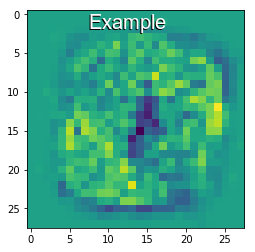

In [46]:
display(Image(filename='./wm_softmax_mnist_weights/wm_0.png'))

## Further investigation/_Verdere Ondersoek_

Fit the softmax classifier for different values of the regularization parameter - we recommend values evenly spaced on the log scale - and show the corresponding weight images for some digit as the parameter changes.  Explain the changes in the weight images observed. Moreover, plot the accuracy of your classifier as a function of the regularization parameter. Use this plot to expand on your answer.

_Pas die softmax klassifiseerder vir verskillende waardes van die regulerings konstante toe - ons stel voor om waardes te gebruik wat eweredig versprei is op die logaritmiese skaal - vertoon nou die gewigbeelde van 'n spesifieke syfer soos die parameter verander. Verduidelik die veranderinge wat jy waarneem in hierdie beelde soos die parameter verander. Stip ook die akkuraatheid van jou klassifiseerder as 'n funksie van die reguleringskonstante. Gebruik hierdie grafiek om jou vorige antwoord te staaf._